In [3]:
import pandas as pd
import seaborn as sns

In [4]:
#read data, data from https://github.com/dataquestio/project-walkthroughs/tree/master/linear_regression
teams = pd.read_csv("<insert file path here>")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [11]:
#select only relevant columns as new table
teams1 = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]
teams1

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [9]:
#check for and remove missing data (listwise)
teams1[teams1.isnull().any(axis=1)]
teams2 = teams1.dropna()

In [10]:
#visalise clean dataset
teams2

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [12]:
#explore correlations - note high correlation between prev_medals (IV) and medals (DV)
teams2.corr(numeric_only = True)["medals"]

year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

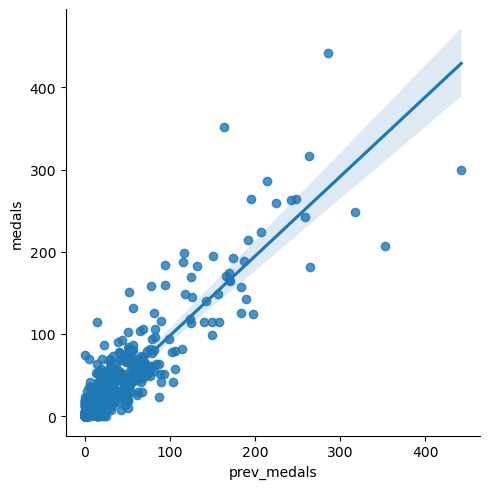

In [13]:
#visualise correlation between athletes and medals
sns.lmplot(x="prev_medals", y="medals", data=teams2, fit_reg=True)

In [20]:
#train test split by year 2012
train = teams2[teams2["year"]< 2012].copy()
test = teams2[teams2["year"] >= 2012].copy()

train.shape
test.shape

(405, 7)

In [47]:
#fit the linear regression model with training data
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(train[["prev_medals"]], train[["medals"]])

print("Coefficient:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficient: [[0.984204]]
Intercept: [1.10693025]


In [28]:
#evaluate the model based on test data
predictions = reg.predict(test[["prev_medals"]])

from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"],predictions)
error

4.018405537160018

In [41]:
#prep data for gradient descent
x = teams2[["prev_medals"]]
y = teams2["medals"]
y = y.to_numpy().flatten()
x = x.to_numpy().flatten()

In [53]:
#gradient descent
import numpy as np
import matplotlib.pyplot as plt

# general function y = wx + b
#loss function = MSE = (predicted y - y)**2

general_loss = lambda x,y,w,b: ((w @ x + b) - y) **2 #predicted y -y squared

#set random value for w and b - 0.5 and 1
w = 0.5
b = 1

def forward (x):
    prediction = x * w + b
    return prediction

def mse (y, prediction):
    return np.mean((prediction - y)**2)

predictions = forward (x)
mse(y, predictions)

def mse_grad (y, predicted):
    grad_w = np.mean(x *(predicted - y)*2)
    grad_b = np.mean((predicted - y)*2)
    return grad_w, grad_b

lr = 0.0001
epochs = 10000

for i in range(epochs):
    predictions = forward (x)
    loss = mse (y, predictions)
    grad_w = mse_grad(y, predictions)[0]
    grad_b = mse_grad(y, predictions)[1]
    w = w - grad_w * lr
    b = b - grad_b * lr
    
    if i % 1000 == 0:
        print (f"Epoch {i} loss: {loss}")
    
print(f"Medals = {b:.4f}: + {w:.4f}: * prev_medals") 

Epoch 0 loss: 420.9606504468719
Epoch 1000 loss: 173.5082156306271
Epoch 2000 loss: 173.5074790635054
Epoch 3000 loss: 173.506966549016
Epoch 4000 loss: 173.50660993372034
Epoch 5000 loss: 173.50636179543014
Epoch 6000 loss: 173.5061891370731
Epoch 7000 loss: 173.50606899878954
Epoch 8000 loss: 173.5059854047636
Epoch 9000 loss: 173.50592723878222
Medals = 1.0561: + 0.9684: * prev_medals


In [54]:
#comparing output from Linear Regression and Gradient Descent
print(f"Linear Regression: Medals = {reg.intercept_.item():.4f} + {reg.coef_[0, 0]:.4f} * prev_medals")
print(f"Gradient Descent: Medals = {b:.4f} + {w:.4f} * prev_medals") 

Linear Regression: Medals = 1.1069 + 0.9842 * prev_medals
Gradient Descent: Medals = 1.0561 + 0.9684 * prev_medals
